In [64]:
# importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [65]:
# loading the dataset

df = pd.read_csv(r'D:\Excelr\Data_Science _Course\Code\DATASET\Heart Prediction Quantum Dataset.csv')
df

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1
...,...,...,...,...,...,...,...
495,34,0,126,292,116,9.303403,0
496,41,0,164,248,114,9.067889,0
497,45,1,159,175,75,8.718708,0
498,55,0,107,157,101,7.337650,1


In [66]:
# to get the basic info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    500 non-null    int64  
 1   Gender                 500 non-null    int64  
 2   BloodPressure          500 non-null    int64  
 3   Cholesterol            500 non-null    int64  
 4   HeartRate              500 non-null    int64  
 5   QuantumPatternFeature  500 non-null    float64
 6   HeartDisease           500 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.5 KB


In [67]:
# to get the Basic stats of data

df.describe()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,54.864000,0.468000,132.874000,221.50000,88.766000,8.317407,0.600000
std,14.315004,0.499475,26.418516,43.86363,17.417289,0.919629,0.490389
min,30.000000,0.000000,90.000000,150.00000,60.000000,6.164692,0.000000
25%,43.000000,0.000000,111.000000,183.75000,73.000000,7.675779,0.000000
50%,55.000000,0.000000,132.000000,221.00000,89.000000,8.323064,1.000000
75%,66.250000,1.000000,155.000000,258.00000,104.000000,8.935999,1.000000
max,79.000000,1.000000,179.000000,299.00000,119.000000,10.784886,1.000000


Gender


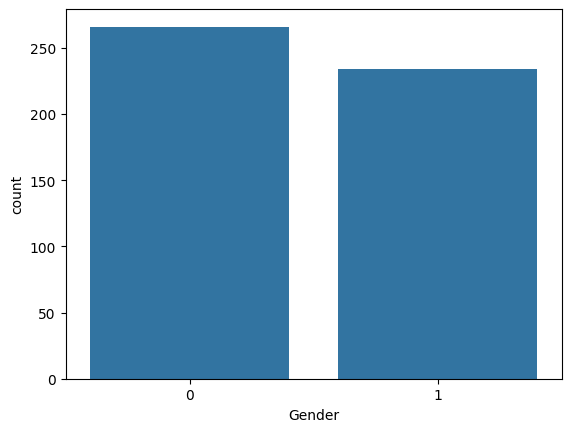

HeartDisease


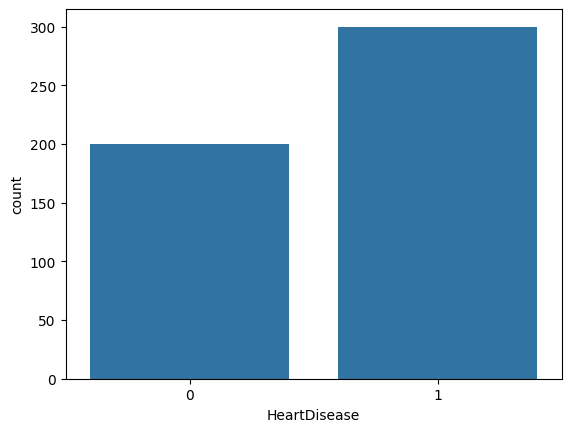

In [68]:
# to create countplot of data like Gender and HeartDisease

for i in ['Gender','HeartDisease']:
    print(i)
    sns.countplot(data=df,x=i)
    plt.show() 

Age


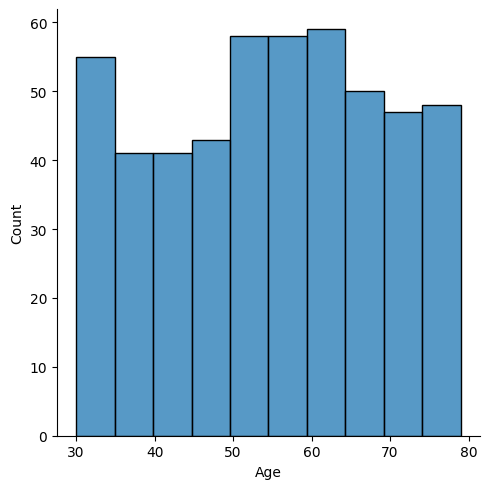

BloodPressure


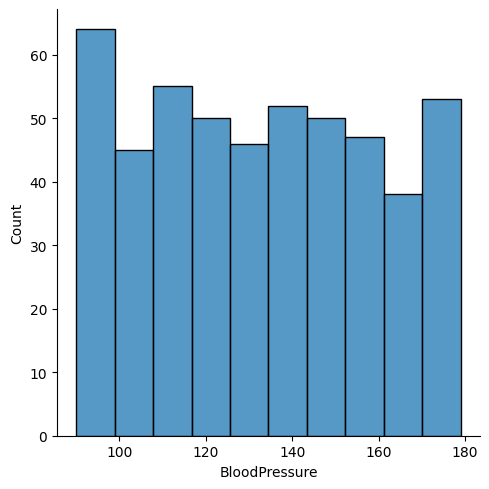

Cholesterol


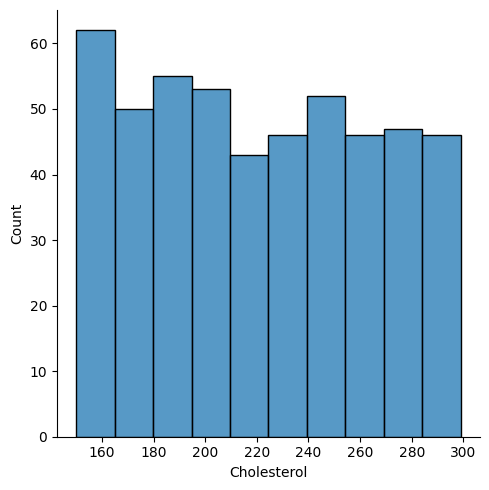

HeartRate


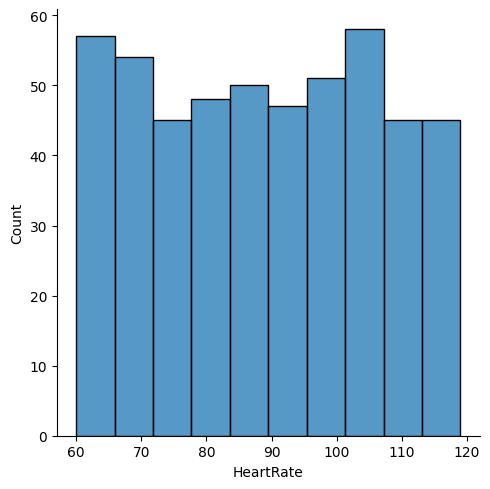

QuantumPatternFeature


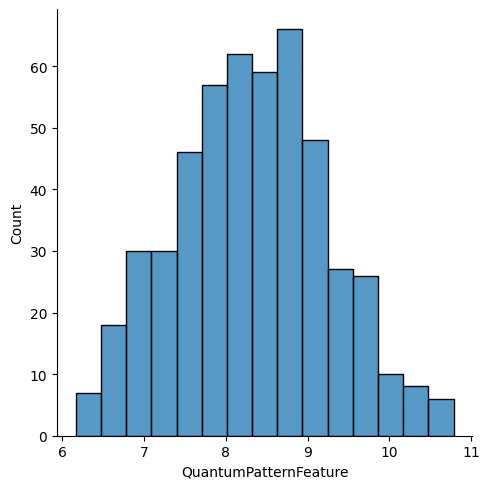

In [69]:
# to create distribution plot on some data 

for i in ['Age','BloodPressure', 'Cholesterol', 'HeartRate','QuantumPatternFeature']:
    print(i)
    sns.displot(df[i])
    plt.show()

Age


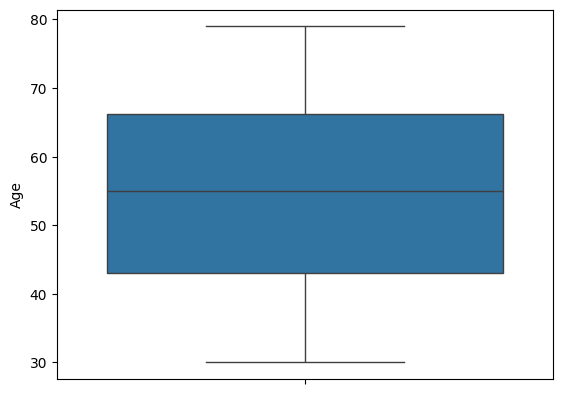

BloodPressure


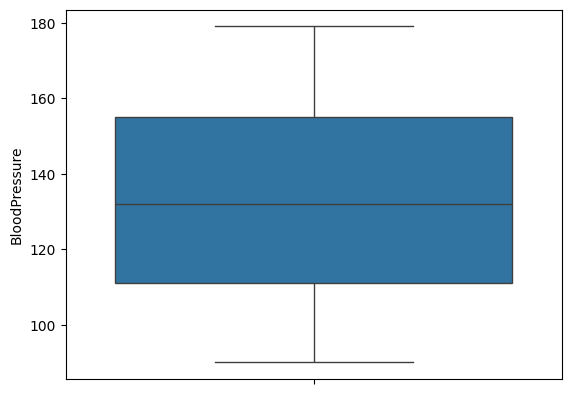

Cholesterol


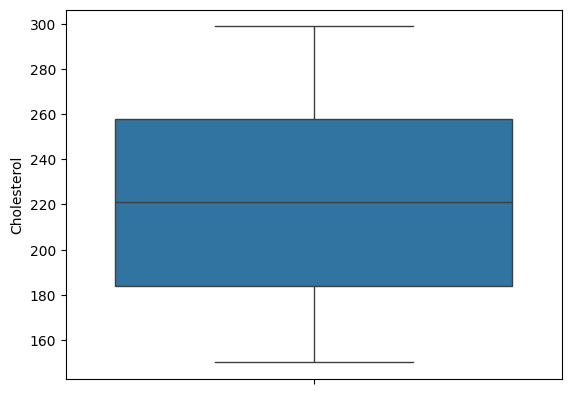

HeartRate


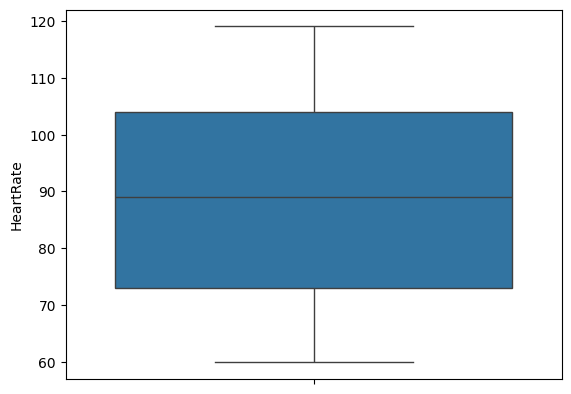

QuantumPatternFeature


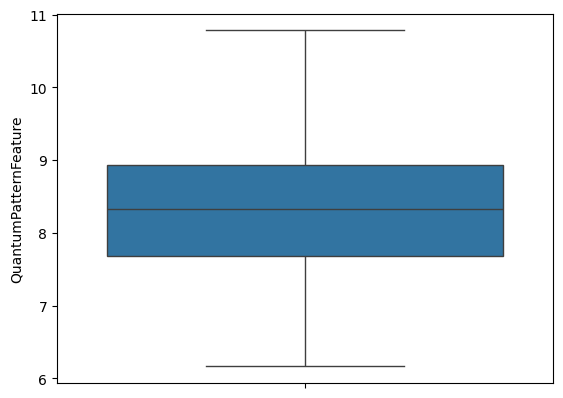

In [70]:
# to create Box plot on some data for checking outliers

for i in ['Age','BloodPressure', 'Cholesterol', 'HeartRate','QuantumPatternFeature']:
    print(i)
    sns.boxplot(df[i])
    plt.show()

In [71]:
# to assign x data and y data
x = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [72]:
x

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature
0,68,1,105,191,107,8.362241
1,58,0,97,249,89,9.249002
2,44,0,93,190,82,7.942542
3,72,1,93,183,101,6.495155
4,37,0,145,166,103,7.653900
...,...,...,...,...,...,...
495,34,0,126,292,116,9.303403
496,41,0,164,248,114,9.067889
497,45,1,159,175,75,8.718708
498,55,0,107,157,101,7.337650


In [73]:
y

0      1
1      0
2      1
3      1
4      1
      ..
495    0
496    0
497    0
498    1
499    0
Name: HeartDisease, Length: 500, dtype: int64

In [74]:
# to get the average of all data

for i in df.columns:
    print(i,df[i].mean())

Age 54.864
Gender 0.468
BloodPressure 132.874
Cholesterol 221.5
HeartRate 88.766
QuantumPatternFeature 8.317407444794
HeartDisease 0.6


In [75]:
# to perform Std scaling to improve accuracy

ss = StandardScaler()
x = ss.fit_transform(x)

In [76]:
x = pd.DataFrame(data=x,columns=['Age','Gender','BloodPressure','Cholesterol','HeartRate','QuantumPatternFeature'])# to change np array to dataframe

for i in x.columns:
    print(i,x[i].mean())

Age 2.0250467969162856e-16
Gender -2.1316282072803006e-17
BloodPressure 1.7763568394002506e-16
Cholesterol 3.552713678800501e-18
HeartRate -2.8332891588433995e-16
QuantumPatternFeature -5.684341886080802e-17


In [77]:
# to split the data 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [78]:
x_train

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature
471,1.547898,-0.937923,-1.321381,0.490646,-1.538288,-0.643639
26,-0.270197,1.066186,0.080554,-0.490646,1.680128,1.443904
7,-0.479977,-0.937923,0.876248,0.330901,-1.595760,0.908552
453,1.687752,-0.937923,-0.298347,-0.924241,-0.963571,-1.758107
108,-1.249171,1.066186,-1.510832,-1.266552,1.335298,-1.535741
...,...,...,...,...,...,...
106,-1.039391,-0.937923,0.989918,1.677326,0.703109,0.489062
270,0.359144,-0.937923,0.914138,-1.266552,1.047939,-0.520199
348,0.498997,-0.937923,-1.018260,0.148335,0.990468,-0.119413
435,1.198265,-0.937923,0.080554,-1.586043,0.128392,-1.961112


In [79]:
x_test

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature
361,-1.389025,1.066186,-0.563578,1.220911,-1.135986,1.669425
73,0.568924,1.066186,0.497346,-1.380656,1.105411,-0.441737
374,-0.200270,-0.937923,0.724687,-0.193976,1.162883,1.803845
155,-1.528878,1.066186,-1.548722,-0.810137,-1.135986,0.796481
104,-1.249171,1.066186,-0.828809,0.216797,-0.906099,0.325850
...,...,...,...,...,...,...
110,0.638851,1.066186,0.686797,0.810137,-0.331382,0.074973
318,0.498997,1.066186,-0.298347,0.262439,-0.963571,-0.739919
428,-0.060417,1.066186,0.270005,-1.494760,1.737600,0.533905
29,1.617825,1.066186,1.293039,-1.061165,-0.101495,-1.294660


In [80]:
y_train

471    1
26     0
7      0
453    1
108    1
      ..
106    0
270    1
348    1
435    1
102    1
Name: HeartDisease, Length: 335, dtype: int64

In [81]:
y_test

361    0
73     1
374    0
155    0
104    1
      ..
110    0
318    1
428    0
29     1
437    1
Name: HeartDisease, Length: 165, dtype: int64

In [82]:
#  to get the k value for knn (Elbow method)

error_rate = []

for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred_test = knn.predict(x_test)
    error = float(np.mean(y_pred_test != y_test))
    error_rate.append(error)

In [83]:
error_rate

[0.21818181818181817,
 0.18787878787878787,
 0.1696969696969697,
 0.15757575757575756,
 0.1393939393939394,
 0.16363636363636364,
 0.16363636363636364,
 0.14545454545454545,
 0.15757575757575756,
 0.16363636363636364,
 0.15757575757575756,
 0.15757575757575756,
 0.16363636363636364,
 0.15151515151515152,
 0.14545454545454545,
 0.1393939393939394,
 0.14545454545454545,
 0.12121212121212122,
 0.1393939393939394,
 0.14545454545454545,
 0.13333333333333333,
 0.1393939393939394,
 0.13333333333333333,
 0.14545454545454545,
 0.15151515151515152,
 0.14545454545454545,
 0.1393939393939394,
 0.14545454545454545,
 0.13333333333333333,
 0.1393939393939394]

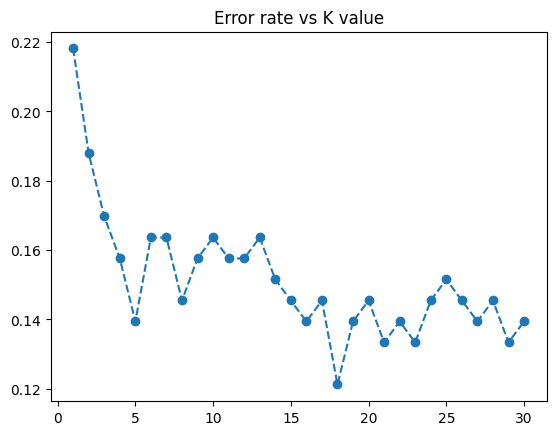

In [84]:
# to plot a graph

plt.plot(range(1,31),error_rate,marker='o',linestyle='--')
plt.title('Error rate vs K value')
plt.show()

In [85]:
# to assign Kneighbour to a variable

knn = KNeighborsClassifier(n_neighbors=7)

In [86]:
# to fit the training data

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [87]:
# to get the prediction

y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [88]:
y_pred_train

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,

In [89]:
y_pred_test

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [90]:
# to get the classification report of training data

print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       134
           1       0.93      0.95      0.94       201

    accuracy                           0.92       335
   macro avg       0.92      0.92      0.92       335
weighted avg       0.92      0.92      0.92       335



In [91]:
# to get the classification report of testing data

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80        66
           1       0.87      0.86      0.86        99

    accuracy                           0.84       165
   macro avg       0.83      0.83      0.83       165
weighted avg       0.84      0.84      0.84       165



In [92]:
# to get the input from the user

Age = int(input('Enter Your Age : '))
Gender =  int(input('Enter Your Gender[Male=1 & Female=0] : '))
BloodPressure =  int(input('Enter Your Blood Pressure :'))
Cholesterol =  int(input('Enter Your Cholestrol : '))
HeartRate =  int(input('Enter Your Heart Rate : '))
QuantumPatternFeature =  float(input('Enter Your QuantumPatternFeature : '))

user_input = np.array([Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature]).reshape(1,-1)
user_input = ss.transform(user_input)

if knn.predict(user_input) == 0:
    print("Hooray! , You don't have Heart Disease")
else :
    print("Oops! , You have Heart Disease")

Enter Your Age :  68
Enter Your Gender[Male=1 & Female=0] :  1
Enter Your Blood Pressure : 110
Enter Your Cholestrol :  200
Enter Your Heart Rate :  110
Enter Your QuantumPatternFeature :  8.3


Oops! , You have Heart Disease


C:\Users\Muhammed Thouyib TK\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Muhammed Thouyib TK\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
